In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing MNIST Data from Keras

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

### Lets get a single image
- Shape is 28X28
- All images are the same size

In [8]:
single_image = x_train[0]

In [9]:
single_image.shape

(28, 28)

## Will use matplotlib to plot image 
- imshow features allows us to visualize the image
- We can see the number 5 below
- Though this is a color image the mnist data set is a greyscale

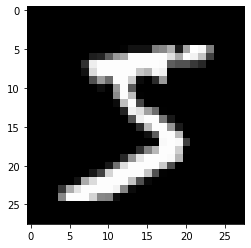

In [10]:
plt.imshow(single_image, cmap="gray")

### Exploring the labels
- Very first value is the number they represent
- Labels cannot be passed as such because the network will recognize it as a continuous value
- We will need to one hot encode this

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

### ONe Hot
- y train needs to be transformed to one hot encoding so that each label is one hot to represented by a category 

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### We will convert the y label and the x label to categorical 
- One hot encoding

In [18]:
y_cat_test = to_categorical(y_test)

In [19]:
y_cat_train = to_categorical(y_train)

## Normalize the training data
- Recall its just image data 
- values go form 0 to 255
- min is 0 
- To make sure we dont run into any gradient problems scale to 0 adn 1
- We only fit on the training data because we do not want to assume prior knowledge of the test data

In [20]:
x_train = x_train/255

In [21]:
x_test = x_test/255

In [22]:
scaled_image = x_train[0]

## Since the ratio is the same for the image the image will show
- This will work very well with our network

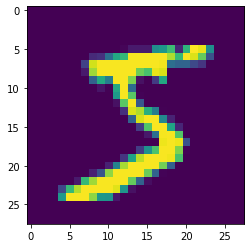

In [23]:
plt.imshow(scaled_image)

### Last step is to reshape the data 
- correct for CNN 
- need to add one more to tell our network if we are dealing with a single RGB channel (0 to 1)

In [24]:
x_train.shape

(60000, 28, 28)

## Rehape Batch
- bAtch size
- width
- height
- Color Channel (grey Scale)

In [25]:
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_test = x_test.reshape(10000,28,28,1)

### Creating the Model
- Flatten before feeding into our Final Dense Layer
- Filters are to be more when the image data is more complex, if we were using a data set such as a street sign we may need to consider the shape of the signs etc. so more filters
- kernal size = 4X4 - based on details of the image
- padding - Valid - no padding assumes all dimentions will be covered by kernal and stride i specified - fit perfectly, (if not overshoting), "Same"-> automatically figures what pading should be


In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1)
          , input_shape = (28,28,1), activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
## multiclass
model.add(Dense(units = 10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Early stoping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
stop = EarlyStopping(monitor="val_loss", mode = "min", patience=1)

In [32]:
model.fit(x_train,y_cat_train, epochs=10, validation_data=(x_test,y_cat_test), callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.1311 - accuracy: 0.9611 - val_loss: 0.0458 - val_accuracy: 0.9841
Epoch 2/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0436 - val_accuracy: 0.9846
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0468 - val_accuracy: 0.9848


In [33]:
metrics = pd.DataFrame(model.history.history)

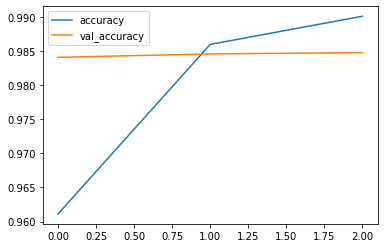

In [34]:
metrics[["accuracy","val_accuracy"]].plot()

### Model Saving

In [39]:
model.save("resources/mnst.h5")

In [40]:
from tensorflow.keras.models import load_model

In [41]:
mnss = load_model("resources/mnst.h5")

In [43]:
import coremltools

In [44]:
output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
your_model = coremltools.converters.keras.convert('resources/mnst.h5', input_names=['image'], output_names=['output'], 
                                                   class_labels=output_labels, image_input_names='image')

ValueError: Unknown initializer: GlorotUniform

In [35]:
model.evaluate(x_test,y_cat_test, verbose=0)

[0.04680381961361272, 0.9848]

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
predictions = model.predict_classes(x_test)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [60]:
print(confusion_matrix(y_test, predictions))

[[ 973    1    1    0    0    0    1    0    3    1]
 [   0 1128    1    1    0    0    2    0    3    0]
 [   0    1 1023    0    1    0    1    4    2    0]
 [   0    0    4  998    0    4    0    0    2    2]
 [   0    0    2    0  970    0    0    0    3    7]
 [   2    0    0    4    0  883    2    0    1    0]
 [   5    2    0    0    1    3  944    0    3    0]
 [   1    1   11    1    0    0    0 1006    1    7]
 [   3    0    2    1    0    1    0    1  964    2]
 [   2    1    0    1   12    2    0    1    1  989]]


In [61]:
import seaborn as sns

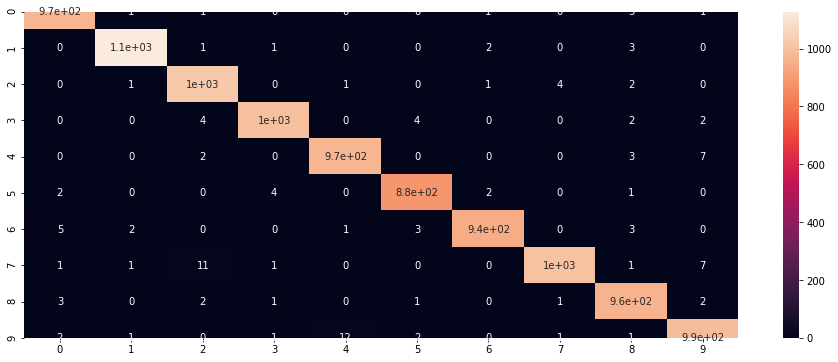

In [65]:
plt.figure(figsize=(16,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)